<a href="https://colab.research.google.com/github/rocx320/ImageAnalytics/blob/main/22447226_IA_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Helper function to add noise to the image
def add_noise(image, noise_type='salt_pepper', noise_level=0.1):
    noisy_image = image.copy()
    if noise_type == 'salt_pepper':
        mask = np.random.rand(*image.shape[:2]) < noise_level / 2
        noisy_image[mask] = 0
        mask = np.random.rand(*image.shape[:2]) < noise_level / 2
        noisy_image[mask] = 255
    elif noise_type == 'speckle':
        noise = noise_level * np.random.randn(*image.shape)
        noisy_image = image + image * noise
    elif noise_type == 'gaussian':
        noise = noise_level * np.random.randn(*image.shape)
        noisy_image = image + noise
    elif noise_type == 'poisson':
        noisy_image = np.random.poisson(image / noise_level) * noise_level
    elif noise_type == 'random':
        noisy_image = np.random.randint(0, 256, size=image.shape, dtype=np.uint8)
    return noisy_image

# Helper function to calculate PSNR (Peak Signal-to-Noise Ratio)
def calculate_psnr(original_image, denoised_image):
    mse = np.mean((original_image - denoised_image) ** 2)
    psnr = 10 * np.log10(255**2 / mse)
    return psnr

# Load the image
image = cv2.imread('/content/melanoma_10112.jpg')

# Add noise to the image
noisy_image = add_noise(image, noise_type='salt_pepper', noise_level=0.1)

# Apply Median Filtering
denoised_image_median = cv2.medianBlur(noisy_image, ksize=3)

# Apply Gaussian Filtering
denoised_image_gaussian = cv2.GaussianBlur(noisy_image, ksize=(3, 3), sigmaX=1)

# Apply Non-local Means Denoising
denoised_image_nlm = cv2.fastNlMeansDenoisingColored(noisy_image, None, 10, 10, 7, 21)

# Calculate PSNR for each denoised image
psnr_median = calculate_psnr(image, denoised_image_median)
psnr_gaussian = calculate_psnr(image, denoised_image_gaussian)
psnr_nlm = calculate_psnr(image, denoised_image_nlm)



Original Image


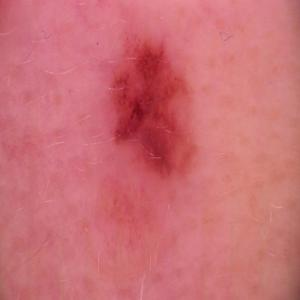

In [ ]:
# Display the results
print('Original Image')
cv2_imshow(image)


Noisy Image


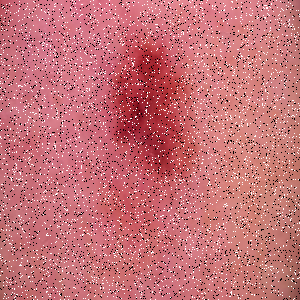

In [ ]:
print('Noisy Image')
cv2_imshow(noisy_image)


Median Filtered (PSNR: 46.74 dB)


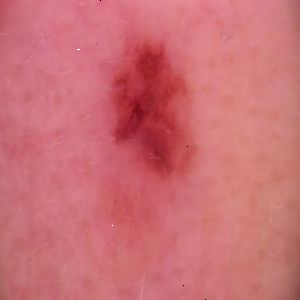

In [ ]:
print(f'Median Filtered (PSNR: {psnr_median:.2f} dB)')
cv2_imshow( denoised_image_median)


#Median Filtering:
The denoised image using median filtering has a PSNR of 46.74 dB. This indicates that the median filtering technique has effectively reduced the noise in the image while preserving image details. The high PSNR value suggests that this technique has performed well in removing salt and pepper noise from the image.

Gaussian Filtered (PSNR: 30.54 dB)


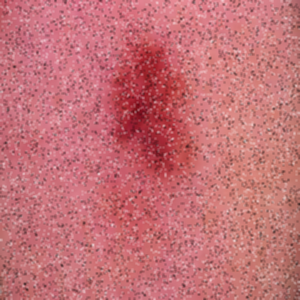

In [ ]:
print(f'Gaussian Filtered (PSNR: {psnr_gaussian:.2f} dB)')
cv2_imshow( denoised_image_gaussian)


# Gaussian Filtering:
The denoised image using Gaussian filtering has a PSNR of 30.54 dB. This indicates that the Gaussian filtering technique has reduced the noise to some extent, but the image quality might have been affected. The lower PSNR value suggests that some image details might have been blurred in the process of reducing the noise.

Non-local Means Denoised (PSNR: 33.37 dB)


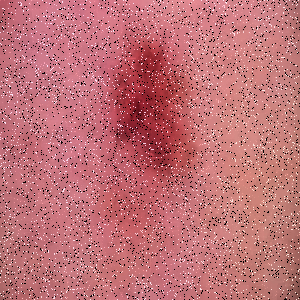

In [ ]:
print(f'Non-local Means Denoised (PSNR: {psnr_nlm:.2f} dB)')
cv2_imshow( denoised_image_nlm)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Non-local Means Denoising:
The denoised image using non-local means denoising has a PSNR of 33.37 dB. This indicates that the non-local means denoising technique has reduced the noise, but it might have introduced some level of blurring. The PSNR value is higher than the Gaussian filtering technique, suggesting that this technique has performed better in preserving image details.

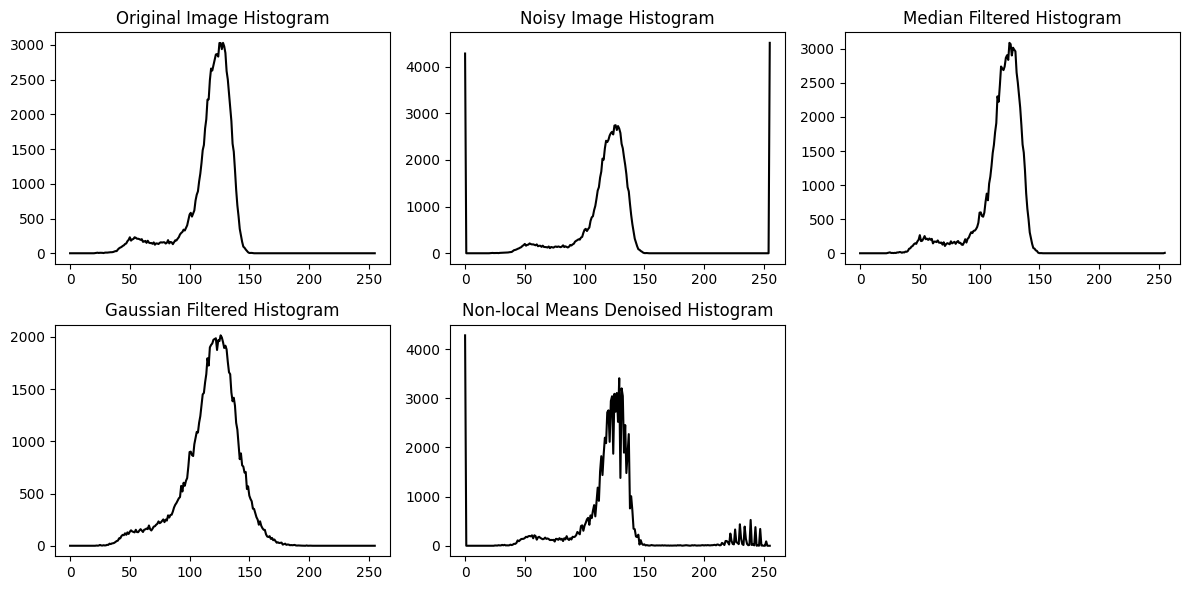

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to add noise to the image
def add_noise(image, noise_type='salt_pepper', noise_level=0.1):
    noisy_image = image.copy()
    if noise_type == 'salt_pepper':
        mask = np.random.rand(*image.shape[:2]) < noise_level / 2
        noisy_image[mask] = 0
        mask = np.random.rand(*image.shape[:2]) < noise_level / 2
        noisy_image[mask] = 255
    elif noise_type == 'speckle':
        noise = noise_level * np.random.randn(*image.shape)
        noisy_image = image + image * noise
    elif noise_type == 'gaussian':
        noise = noise_level * np.random.randn(*image.shape)
        noisy_image = image + noise
    elif noise_type == 'poisson':
        noisy_image = np.random.poisson(image / noise_level) * noise_level
    elif noise_type == 'random':
        noisy_image = np.random.randint(0, 256, size=image.shape, dtype=np.uint8)
    return noisy_image

# Helper function to calculate PSNR (Peak Signal-to-Noise Ratio)
def calculate_psnr(original_image, denoised_image):
    mse = np.mean((original_image - denoised_image) ** 2)
    psnr = 10 * np.log10(255**2 / mse)
    return psnr

# Load the image
image = cv2.imread('/content/melanoma_10112.jpg')

# Add noise to the image
noisy_image = add_noise(image, noise_type='salt_pepper', noise_level=0.1)

# Apply Median Filtering
denoised_image_median = cv2.medianBlur(noisy_image, ksize=3)
psnr_median = calculate_psnr(image, denoised_image_median)

# Apply Gaussian Filtering
denoised_image_gaussian = cv2.GaussianBlur(noisy_image, ksize=(3, 3), sigmaX=1)
psnr_gaussian = calculate_psnr(image, denoised_image_gaussian)

# Apply Non-local Means Denoising
denoised_image_nlm = cv2.fastNlMeansDenoisingColored(noisy_image, None, 10, 10, 7, 21)
psnr_nlm = calculate_psnr(image, denoised_image_nlm)

# Calculate histograms
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_noisy = cv2.calcHist([noisy_image], [0], None, [256], [0, 256])
hist_median = cv2.calcHist([denoised_image_median], [0], None, [256], [0, 256])
hist_gaussian = cv2.calcHist([denoised_image_gaussian], [0], None, [256], [0, 256])
hist_nlm = cv2.calcHist([denoised_image_nlm], [0], None, [256], [0, 256])

# Plot the histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.plot(hist_original, color='black')
plt.title('Original Image Histogram')
plt.subplot(2, 3, 2)
plt.plot(hist_noisy, color='black')
plt.title('Noisy Image Histogram')
plt.subplot(2, 3, 3)
plt.plot(hist_median, color='black')
plt.title('Median Filtered Histogram')
plt.subplot(2, 3, 4)
plt.plot(hist_gaussian, color='black')
plt.title('Gaussian Filtered Histogram')
plt.subplot(2, 3, 5)
plt.plot(hist_nlm, color='black')
plt.title('Non-local Means Denoised Histogram')

# Display the images and histograms
plt.tight_layout()
plt.show()

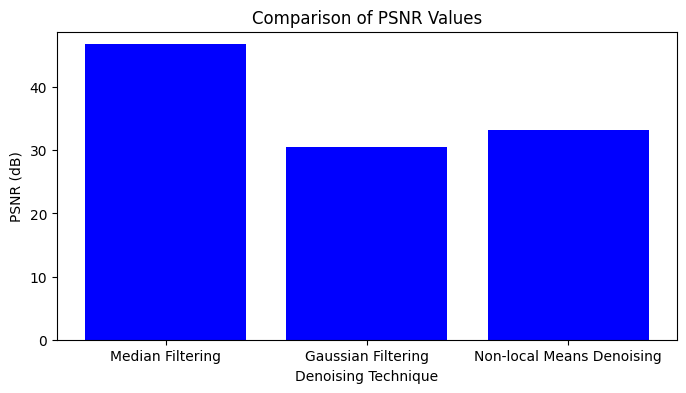

In [ ]:
# PSNR values
psnr_values = [psnr_median, psnr_gaussian, psnr_nlm]
denoising_techniques = ['Median Filtering', 'Gaussian Filtering', 'Non-local Means Denoising']

# Plot PSNR graph
plt.figure(figsize=(8, 4))
plt.bar(denoising_techniques, psnr_values, color='blue')
plt.ylim(0, max(psnr_values) + 2)
plt.xlabel('Denoising Technique')
plt.ylabel('PSNR (dB)')
plt.title('Comparison of PSNR Values')
plt.show()